In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/raw/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df_copy = df.copy()

In [6]:
df_copy.drop('customerID', axis=1, inplace=True)

In [7]:
df_copy['TotalCharges'] = pd.to_numeric(df_copy['TotalCharges'], errors='coerce')

In [8]:
df_copy.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df_copy.dropna(how='any', axis=0, inplace=True)

In [10]:
df_copy.duplicated().sum()

np.int64(22)

In [11]:
df_copy.drop_duplicates(inplace=True)

In [12]:
df_copy.shape

(7010, 20)

In [13]:
df_copy.rename(columns={'Partner':'Marital_Status'}, inplace=True)

In [14]:
df_copy.columns

Index(['gender', 'SeniorCitizen', 'Marital_Status', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
df_copy['Marital_Status'] = df_copy['Marital_Status'].map({'Yes':'Married', 'No':'Single'})

Text(0.5, 1.0, 'Churn vs Non-Churn')

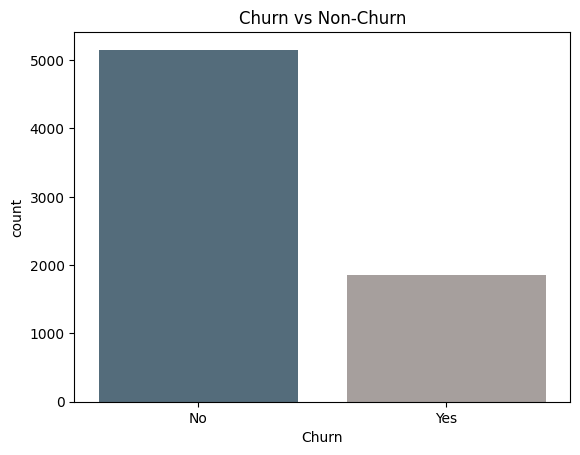

In [ ]:
colors = ['#4e6e81','#a79e9c','#3d4d55','#2e3840','#000000']
sns.countplot(data=df_copy, x='Churn', palette=colors)
plt.title('Churn vs Non-Churn')

In [34]:
round(df_copy['Churn'].value_counts()/len(df_copy)*100, 2)

Churn
No     73.51
Yes    26.49
Name: count, dtype: float64

In [40]:
# First, get counts
contract_churn_counts = df.groupby(['PaymentMethod', 'Churn']).size().unstack()

# Then calculate percentage
contract_churn_percentage = contract_churn_counts.div(contract_churn_counts.sum(axis=1), axis=0) * 100

# Display the result
print(contract_churn_percentage)

Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700


In [18]:
labels = ['0-19', '20-39','40-59','60-72']
bins = [0,19,39, 59, 72]

df_copy['tenure_group'] = pd.cut(df_copy['tenure'], bins=bins, labels=labels, include_lowest=True)
df_copy['tenure_group'].value_counts()

tenure_group
0-19     2774
60-72    1483
20-39    1415
40-59    1338
Name: count, dtype: int64

## **Exploratory Data Analysis**

### **Univariate Analysis**

In [19]:
df_copy.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


Text(0.5, 1.0, 'Customer count for tenure group who churned')

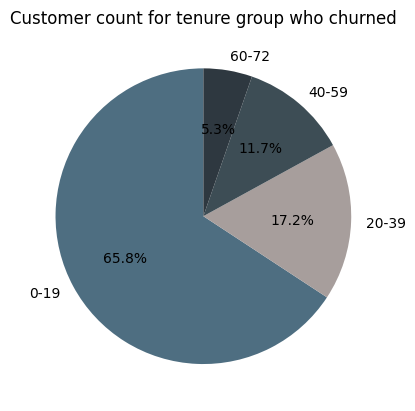

In [39]:
colors = ['#4e6e81','#a79e9c','#3d4d55','#2e3840','#000000']
labels = df_copy[df_copy['Churn'] == 'Yes']['tenure_group'].value_counts().sort_index().index
values = df_copy[df_copy['Churn'] == 'Yes']['tenure_group'].value_counts().sort_index()
plt.figure()
plt.pie(x=values, labels=labels,autopct="%1.1f%%", startangle=90, colors = colors)
plt.title("Customer count for tenure group who churned")

Text(0.5, 1.0, 'Customer count for the Gender')

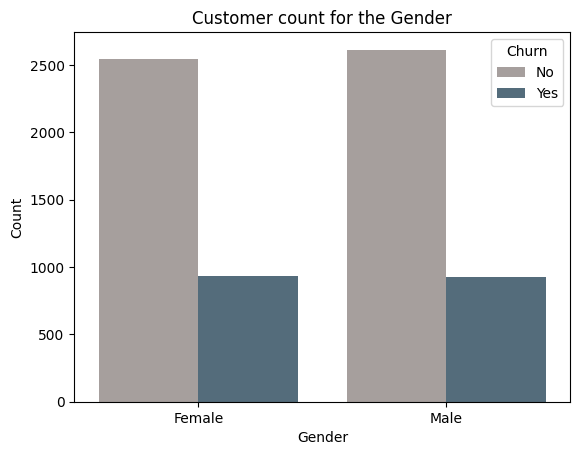

In [21]:
plt.figure()
sns.countplot(data=df_copy, x='gender',hue='Churn', palette={'Yes': '#4e6e81', 'No':'#a79e9c'})
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Customer count for the Gender")

Text(0.5, 1.0, 'Customer count for the Senior Citizen')

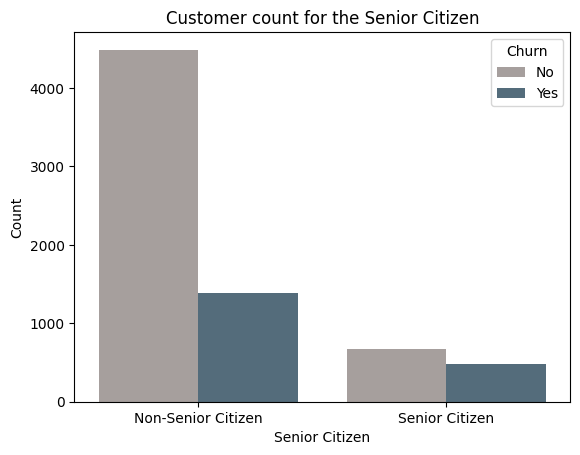

In [22]:
labels = ['Non-Senior Citizen','Senior Citizen']
plt.figure()
sns.countplot(data=df_copy, x='SeniorCitizen',hue='Churn', palette={'Yes': '#4e6e81', 'No':'#a79e9c'}).set_xticklabels(labels)
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.title("Customer count for the Senior Citizen")

Text(0.5, 1.0, 'Customer count for the Marital Status')

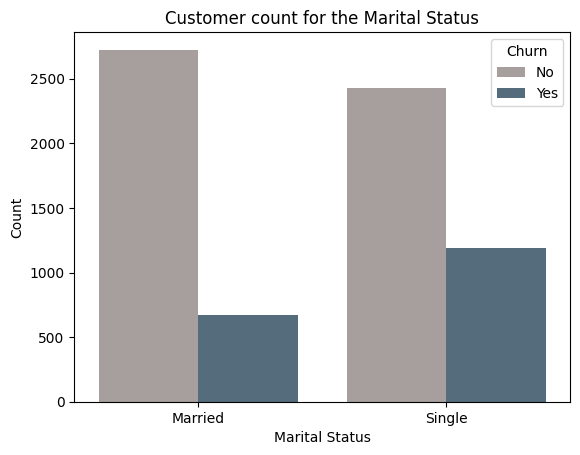

In [23]:
plt.figure()
sns.countplot(data=df_copy, x='Marital_Status',hue='Churn',palette={'Yes': '#4e6e81', 'No':'#a79e9c'})
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Customer count for the Marital Status")

Text(0.5, 1.0, 'Customer count for the Contract')

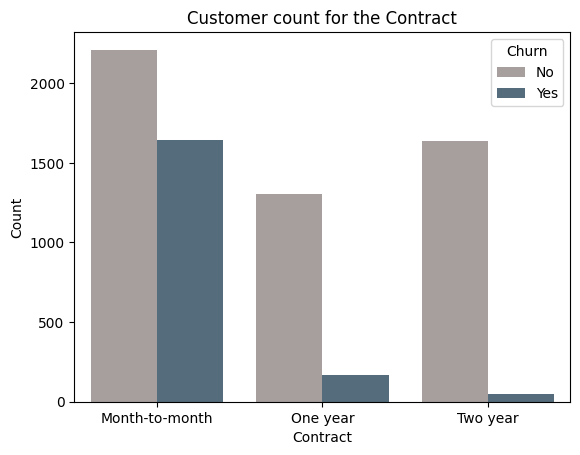

In [24]:
plt.figure()
sns.countplot(data=df_copy, x='Contract',hue='Churn', palette={'Yes': '#4e6e81', 'No':'#a79e9c'})
plt.xlabel("Contract")
plt.ylabel("Count")
plt.title("Customer count for the Contract")

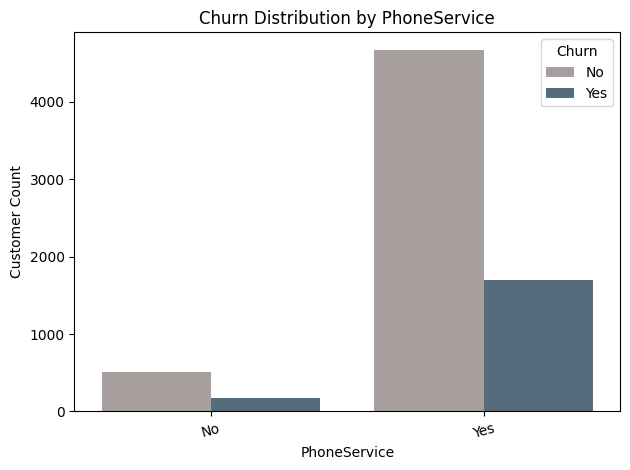

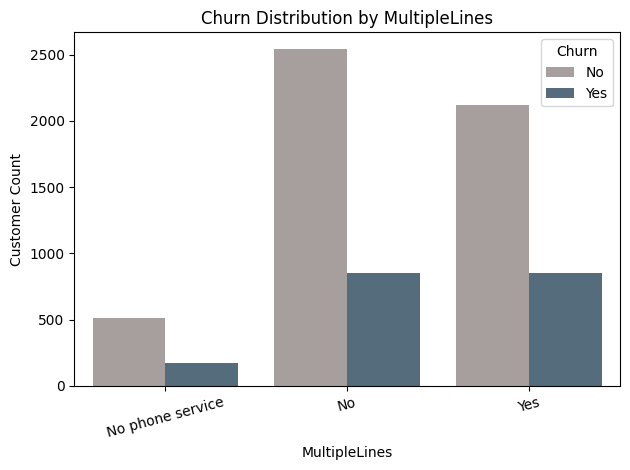

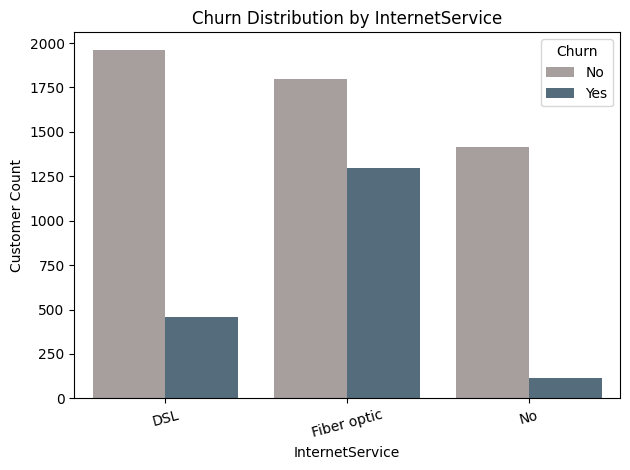

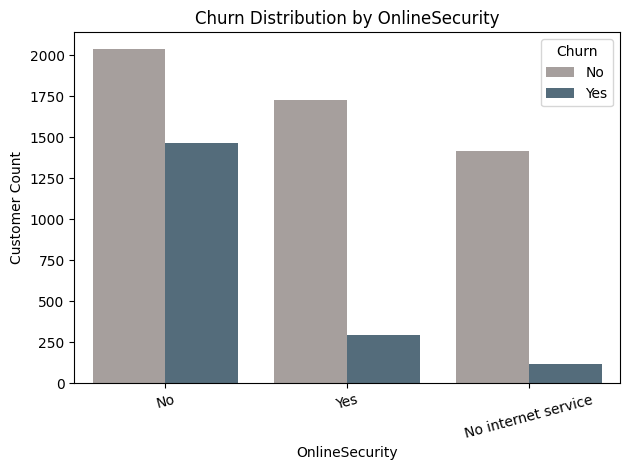

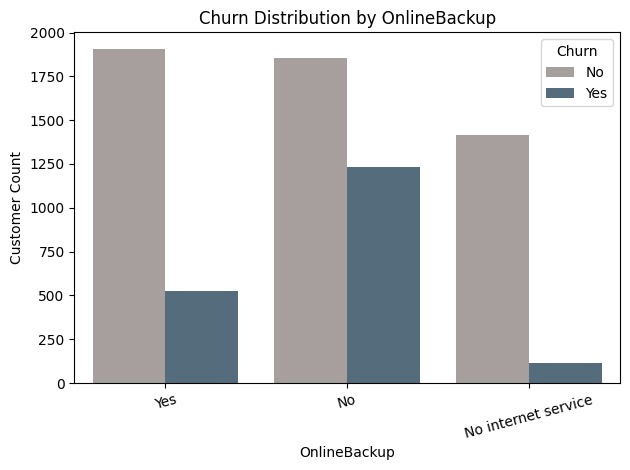

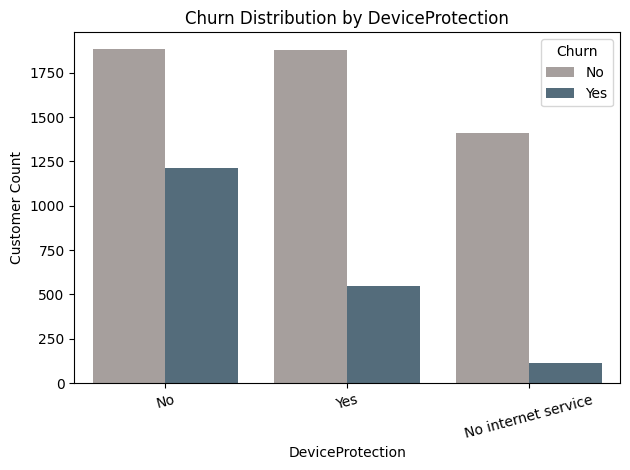

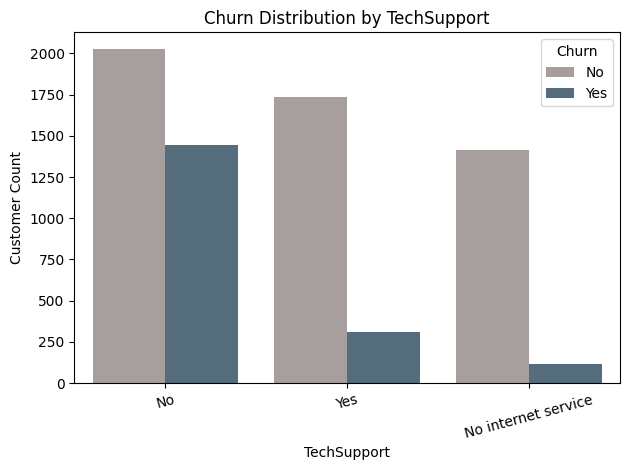

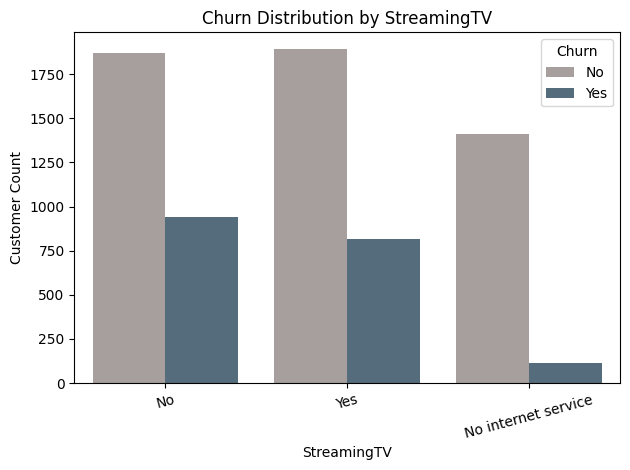

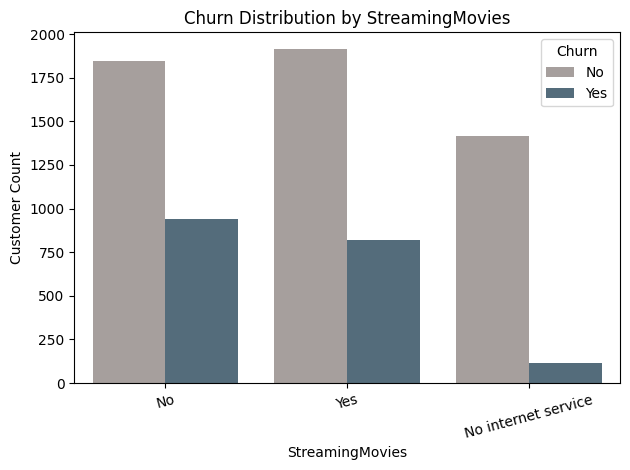

In [25]:
service_cols = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies'
]

for col in service_cols:
    sns.countplot(data=df, x=col, hue='Churn', palette={'Yes': '#4e6e81', 'No':'#a79e9c'})
    plt.title(f'Churn Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Customer Count')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Customer count for the PaperLessBilling')

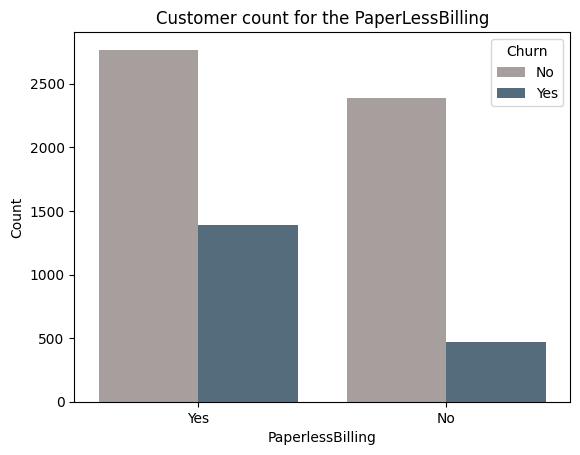

In [26]:
plt.figure()
sns.countplot(data=df_copy, x='PaperlessBilling',hue='Churn', palette={'Yes': '#4e6e81', 'No':'#a79e9c'})
plt.xlabel("PaperlessBilling")
plt.ylabel("Count")
plt.title("Customer count for the PaperLessBilling")

Text(0.5, 1.0, 'Customer count for the Contract')

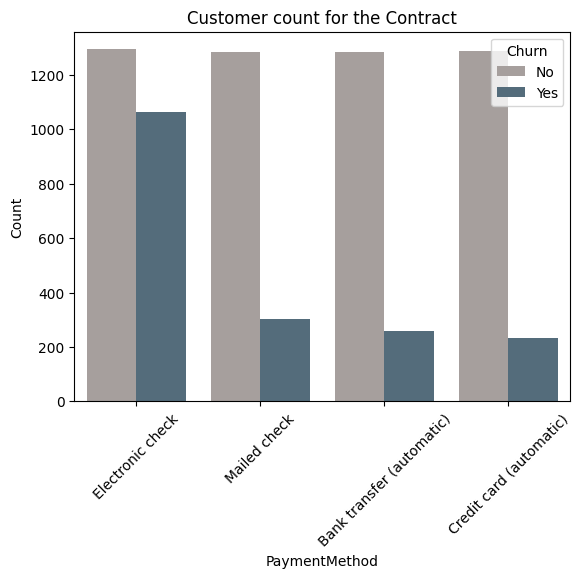

In [27]:
plt.figure()
sns.countplot(data=df_copy, x='PaymentMethod',hue='Churn', palette={'Yes': '#4e6e81', 'No':'#a79e9c'})
plt.xlabel("PaymentMethod")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Customer count for the Contract")

Text(0.5, 1.0, 'Monthly charges by churn')

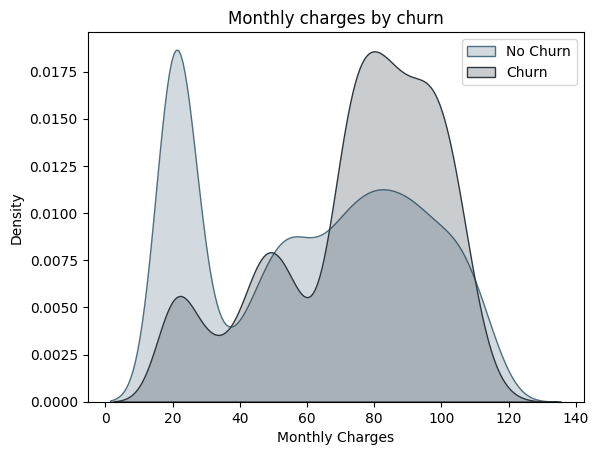

In [28]:
ax = sns.kdeplot(df_copy.MonthlyCharges[df_copy['Churn'] == 'No'], color='#4e6e81', fill=True)
ax = sns.kdeplot(df_copy.MonthlyCharges[df_copy['Churn'] == 'Yes'], color='#2e3840' , fill= True)

ax.legend(['No Churn', 'Churn'])
ax.set_xlabel("Monthly Charges")
ax.set_ylabel("Density")
ax.set_title("Monthly charges by churn")

Text(0.5, 1.0, 'Total charges by churn')

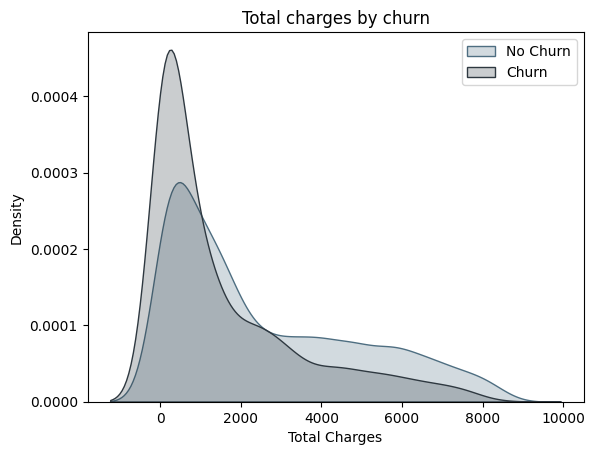

In [29]:
ax = sns.kdeplot(df_copy.TotalCharges[df_copy['Churn'] == 'No'], color='#4e6e81', fill=True)
ax = sns.kdeplot(df_copy.TotalCharges[df_copy['Churn'] == 'Yes'], color='#2e3840' , fill= True)

ax.legend(['No Churn', 'Churn'])
ax.set_xlabel("Total Charges")
ax.set_ylabel("Density")
ax.set_title("Total charges by churn")

In [30]:
df_copy.to_csv('../data/cleaned/final.csv',index=False)